# Project: Predicting Boston Housing Prices


The first project of the Machine Learning Engineer Nanodegree! In this notebook, we will predict boston housing prices emphasizing on importance of model evaluation and validation

In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

import visuals as vs

%matplotlib inline


In [2]:
data = pd.read_csv('housing.csv')
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [3]:
prices = data['MEDV']
features = data.drop('MEDV',axis=1)

In [4]:
prices.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

In [5]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [6]:
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration


## Data Exploration
Here we will make a cursory investigation about the Boston housing data and provide observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help better understand and justify the results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Calculate Statistics
First we will calculate descriptive statistics about the Boston housing prices. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

We will do the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [19]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price)) 
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [8]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


### Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


RM:
    For higher RM value (i.e. for higer number of rooms), the MEDV value would increase. This is because more rooms mostly would imply more area thereby increasing the prices, if all other factors remains same
    
LSTAT:
    For higher LSTAT (percent of lower class workers) value, the MEDV value would decrease. The area dominated by "lower class" workers would lower demand as they would have less purchasing power compared to 
   the area dominated by "upper class" workers. Also the area may be little unsafe where LSTAT is higher futher lowering demand and prices. 
   
PTRATIO:
    For higher PTRATIO (ratio of students to teachers) value, the MEDV value would decrease. This is because higer ratio means more students in a class resulting in less time/attention given to a student which may affect their performance in school. Hence prices of the house in area where PTRATIO is high would be lower due to lower demand.
    
    

----

## Developing a Model
In this second section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, we will need do the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [9]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [10]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


R2 = 92.3 %
The above model captures 92.3% variation of the target variable
As the R2 score is high which is closer to 1, it implies that the model successfully captures the variation of the target
variable

### Implementation: Shuffle and Split Data
Our next steps requires that we take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, we will do the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [22]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Training and Testing

Here we will split our dataset into training and testing set. Benefits of splitting a dataset are as follows:
    If we do not split the dataset and test the performance of the model on the same data that was used for training, it is 
highly likely that our model will memorize the data and may not perform well when we try to predict with new data. 

    For a model to generalize well and not just memorize the data, we need to test the model on testing data which is not
used for training the model.
    
    Splitting the data into training and testing set helps the model to generalize well and avoid the issue of overfitting

Splitting into training and testing set also helps us to do model selection and test performance of the model


----

## Analyzing Model Performance
In this third section of the project, we'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, we'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing our model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  


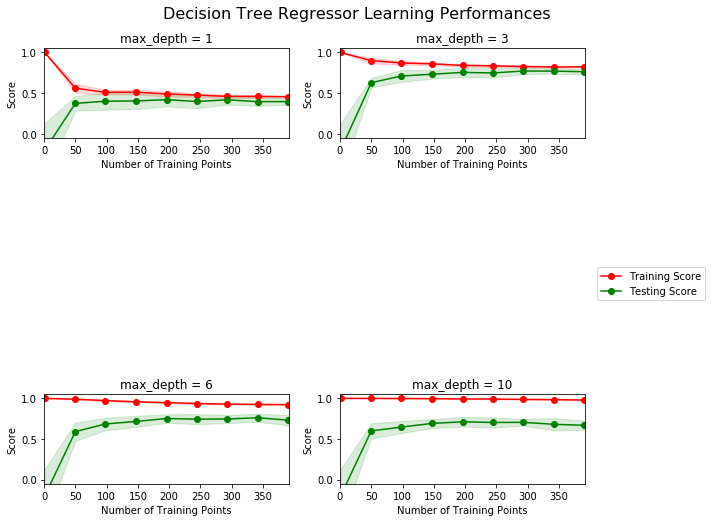

In [20]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Learning the Data

max_depth = 1

We can observe that the maximum depth of this model is 1 and the model if facing a high bias problem
The training curve decreases to a very low score of 0.4 as more training points are added, which implies that the training error increases as we increase number of training points due to high bias
The testing curve increases to a low score of approximately 0.4, which implies that the testing error decreases with the increase in number of training points
Thus, we can say that this model is facing high bias problem where both the training and testing curve are getting coverged at a lower score and higher error
Thus, having more training points would not benefit the model as it is underfitting the dataset. Inorder for the model to perform better we should increase the complexity to better fit the dataset

max_depth =2

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  


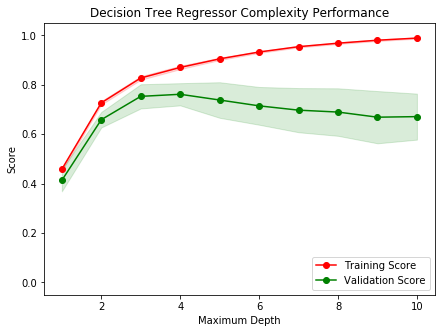

In [21]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff
1. The model with maximum depth of 1 is suffering from high bias:
    Both training and validation scores are low
    They are approximately converging at the same point with little or no gap between the curves
    This indicates the model is not fitting the dataset well and is also not generalizing well 
    hence the model is suffering from high bias
2. The model with maximum depth of 10 is suffering from high variance:
    Training score is  high. Validation score is low
    There is a substantial gap between the training and validation curves
    This indicates the model is fitting the dataset well but is not generalizing well hence the
    model is suffereing from high variance
3.  The model with maximum depth of 4 looks optimum:
    

### Best-Guess Optimal Model
The maximum depth of 4
Validation score is at its highest point at maximum depth of 4
Validation score does not improve further with increasing depth after maximum depth of 4
Without overcomplicating the model, at maximum depth of 4, validation score is at highest and training score
is almost flattening out showing the model's ability to generalize well to unseen data
Also the gap betwwen the training and validation score is not very high showing that the model may not be
suffering from a high variance problem

-----

## Evaluating Model Performance
In this final section of the project, we will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Grid Search
The grid search technique is an exhaustive searching algorithm to find the best estimator by using a subset of 
hyperparameters of the model
This technique allows one to define a grid of parameters that will be searched using K-fold cross-validation. 
This tries to optimize a learning alogorithm by using every combination of provided hyper-parameters to find 
one with the best model performance
This algorithm uses some performance metric (like F1 score) to score the models using cross validation dataset 
and then picks the model with the highest score
Finally it tests the model with the testing data to make sure that the picked model is good


### Cross-Validation

K-fold Cross-validation:
K-fold cross-validation training technique is a method to split training dataset into training and validation 
set without dramatically reducing the amount of data available for model's training
In this technique training dataset is split into K folds of equal size and perform k independent model training
using k-1 parts as training data and 1 part as validation data
The average accuracy of k trainings will be the resulting accuracy of the model

Benefits:
More reliable estimate of out-of-sample performance than train/test split
Reduce the variance of a  single trial of a train/test split
Hence with the benefits of K-fold cross-validation, we are able to use the average testing accuracy as a benchmark
to decide which is the most optimal set of parameters for the learning algorithm
If we do not use a cross-validation set and we run grid-search, we would have different sets of optimal parameters
due to the fact that without a cross-validation set, the estimate of out-of-sample performance would have a high
variance
In summary, without k-fold cross-validation the risk is higher that grid search will select hyper-parameter value
combinations that perform very well on a specific train-test split but poorly otherwise

### Implementation: Fitting a Model
In final implementation we bring everything together and train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, we will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. 


For the `fit_model` function in the code cell below, we will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.model_selection` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [25]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits= 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor,param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Optimal Model


In [26]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


The optimal model has a maximum depth of 4.  
The max depth of optimal model is the same as our guess

### Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 


In [27]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


Prices to recommend:

    1. Client 1: $403,000

    2. Client 2: $237,500

    3. Client 3: $931,600

Data Exploration Findings:

    Minimum price: $105,000.00

    Maximum price: $1,024,800.00

    Mean price: $454,342.94

    Median price $438,900.00

    Standard deviation of prices: $165,171.13

Price Explanation:

    The prices are rounded up to the nearest hundred as the prices in the dataset are all rounded to the 
    nearest hundred

    Compared to the data-exploration, it seems that the house prices for client 1 and client 2 are below
    the mean and median prices:
        For client 2, price seems reasonable due to the high poverty level and high student-to-teacher ratio
        For client 1, price seems reasonable due to the average poverty level and student-to-teacher ratio

    The house price for client 3 is way above the mean and median prices, nearing to the maximum price in
    the dataset:
        This price seems reasonable given the low poverty level and low student-to-teacher ratio with a high
        number of rooms

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [28]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Applicability

This model should not be used in a real-world setting:
1. because the data from 1978 (eventhough multiplicatively scaled to account for 35 years of market inflation) is not relevant anymore as buyers income, feature selection and other factors have changed a lot
2. The features of the data are not sufficient anymore. Other features like quality of appliances, presence of pool, distance/closeness to essential facilities etc should be added to our model
3. This model is not robust enough to make consistent predictions as seen by the Sensitivity section with a price variation of more than \$ 70k  which is significant
4. Data collected in urban city cannot be applied to rural city as the demographics would change and other set of features may be required to better fit the dataset
5. Along with the characteristics of entire neighborhood, other individual features has to be considered for reflectingthe best price for the house as it can have unique features 